# Exercises - Genetic Algorithms

In [1]:
from math import log2, ceil, e, cos, pi

In [2]:
from random import randint,random,sample,uniform,shuffle

In [3]:
from statistics import mean, pstdev

In [4]:
import numpy as np

In [6]:
sample([2,3,52,5],4)

[52, 5, 3, 2]

In [277]:
def Beale(x):
    x1,x2 = x
    if not(-4.5 <= x1 <= 4.5 and -4.5 <= x2 <= 4.5):
        return 'bad input: out of domain'
    return (1.5-x1+x1*x2)**2 + (2.25-x1+x1*(x2**2))**2 + (2.625-x1+x1*(x2**3))**2

El mínimo global está en x = (3, 0.5) y f(x) = 0. \*global minimum

In [278]:
Beale([3,0.5]), Beale([-4.5,-4.5])

(0.0, 181853.61328125)

## 1.
Implementar en el lenguaje de su preferencia, el AG que se diseñó en el ejemplo anterior para resolver la función de Beale.

In [239]:
int('0111010000100011010101011001', 2)

121779545

In [10]:
def bits_req(x_bounds):
    return [ceil(log2((x[1]-(x[0]))*(10**3))) for x in x_bounds]

In [11]:
bits_req([(-4.5,4.5),(-4.5,4.5)])

[14, 14]

In [12]:
def real_from_bits(bit_string, n_variable_bits, n_variable_bounds):
    reals = []
    index = 0
    for n_bits, bound in zip(n_variable_bits,n_variable_bounds):
        bits = bit_string[index:index+n_bits]
        index = n_bits
        d = int(bits, 2)
        r = bound[0] + ((bound[1]-bound[0])*d) / ((2**n_bits)-1)
        reals.append(r)
    return reals

In [246]:
var_bounds = [(-4.5,4.5),(-4.5,4.5)]
n_variable_bits = bits_req(var_bounds)
n_variable_bits

[14, 14]

In [14]:
real_from_bits('11011000000000'+'10001110000000', n_variable_bits, var_bounds)

[3.0942135140084233, 0.49249221754257455]

In [15]:
real_from_bits('01110100001000'+'11010101011001', n_variable_bits, var_bounds)

[-0.41723127632301793, 3.0024720747115916]

In [261]:
example_individual = ('1111111111111111111111011001', n_variable_bits, var_bounds)
example_individual

('1111111111111111111111011001', [14, 14], [(-4.5, 4.5), (-4.5, 4.5)])

In [282]:
def Beale_binary(bit_string, n_variable_bits_req, n_variable_bounds):
    return Beale(real_from_bits(bit_string, n_variable_bits_req, n_variable_bounds))

In [283]:
def Beale_fitness(bit_string, n_variable_bits_req, n_variable_bounds): # a low value is a bad fitness
    return 1/(Beale_binary(bit_string, n_variable_bits_req, n_variable_bounds)+1)

In [284]:
Beale_binary(*example_individual)

170055.8817209396

In [285]:
Beale_fitness(*example_individual)

5.880385373883209e-06

In [286]:
Beale_fitness('11011000000000'+'10001110000000', n_variable_bits, var_bounds)

0.9768962222434674

In [21]:
def random_bin_string(bits):
    string = ''
    for i in range(bits):
        string += str(randint(0,1))
    return string

In [287]:
random_bin_string(4)

'1101'

In [288]:
def random_solution(n_variable_bits_req, n_variable_bounds=False, fitness_func=Beale_fitness):
    individual = ''
    for bits in n_variable_bits_req:
        x_bits = random_bin_string(bits)
        individual += (x_bits)
    if n_variable_bounds:
        return individual, fitness_func(individual, n_variable_bits_req, n_variable_bounds)
    return individual

In [289]:
b_required = bits_req([(2,3),(5,6),(-50,11)])
rand_sol = random_solution(b_required)

b_required, rand_sol, sum(b_required), len(rand_sol)

([10, 10, 16], '110010000101110111111010011101000111', 36, 36)

In [290]:
random_solution(bits_req([(-4.5,4.5),(-4.5,4.5)]))#,n_variable_bounds=[(-4.5,4.5),(-4.5,4.5)])

'0001010111100111101001101011'

In [291]:
random_solution(bits_req([(-4.5,4.5),(-4.5,4.5)]),n_variable_bounds=[(-4.5,4.5),(-4.5,4.5)])

('1001011011110000110010101010', 0.003767538242696452)

In [23]:
def universal_stochastic_selection(population, n_variable_bits_req, n_variable_bounds):
    fitnesses = [x[1] for x in population]
    strings = [x[0] for x in population]
    fitness_mean = mean(fitnesses)
    Ei_s = [fit/fitness_mean for fit in fitnesses]
    r = random()
    parents = []
    sum_ = 0
    for individual,Ei,fit in zip(strings,Ei_s,fitnesses):
        sum_ += Ei
        while sum_ > r:
            parents.append((individual,fit))
            r += 1
    return parents

In [24]:
universal_stochastic_selection([('100010110011110110011000011100110000', 0.15029431701487947),
                                ('110000100011001001100110010010011010', 0.011398346494599433),
                                ('101110111100100000001000011010001010', 2.9777439040564625e-05),
                                ('110101000010111111010100100101110110', 0.008058140115587174),
                                ('001101101111011010101101010101110010', 0.00025309048960844106)],  
                               bits_req([(-4.5, 4.5),(-4.5, 4.5)]),
                               [(-4.5, 4.5),(-4.5, 4.5)])

[('100010110011110110011000011100110000', 0.15029431701487947),
 ('100010110011110110011000011100110000', 0.15029431701487947),
 ('100010110011110110011000011100110000', 0.15029431701487947),
 ('100010110011110110011000011100110000', 0.15029431701487947),
 ('110000100011001001100110010010011010', 0.011398346494599433)]

In [24]:
def k_point_crossover(k_points, p1, p2):
    o1, o2 = '', ''
    index_closer = 0
    for i,point in enumerate(k_points+[len(p1)]):
        if i%2 == 0:
            o1 += p1[index_closer:point]
            o2 += p2[index_closer:point]
        else:
            o1 += p2[index_closer:point]
            o2 += p1[index_closer:point]
        index_closer = point
    return o1,o2

In [26]:
k_point_crossover([2,17],'1000101100hola0110011000011100110000',
 '11010100001011adios10100100101110110')

('10010100001011adi0011000011100110000',
 '1100101100hola011os10100100101110110')

In [108]:
def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

In [26]:
for i,j in grouped([3,2,7,4,10,9,0,14],2):
    print(i,j)

3 2
7 4
10 9
0 14


In [27]:
def mutate(individual, pm):
    mutated = ''
    for i in individual:
        if random() < pm:
            if i == '0':
                mutated += '1'
            else:
                mutated += '0'
        else:
            mutated += i
    return mutated        

In [28]:
mutate('1111111111',.1)

'0111111011'

In [63]:
def mutate_pop(population, pm, n_variable_bits_req, n_variable_bounds, fitness_func=Beale_fitness):
    mutated_pop = []
    length = len(population[0])
    for i in range(len(population)):
        mutated_ind = mutate(population[i][0],pm)
        mutated_pop.append((mutated_ind, fitness_func(mutated_ind, n_variable_bits_req, n_variable_bounds)))     
    return mutated_pop

In [64]:
mutate_pop([('11111111111111111',.4),('00000000000000000',.1)],.1,
          bits_req([(-4.5, 4.5),(-4.5, 4.5)]),
                               [(-4.5, 4.5),(-4.5, 4.5)])

[('11111110111111111', 5.731734830878345e-06),
 ('00001001000100000', 6.363818681642189e-06)]

In [296]:
def GA(μ, gens, pc, pm, n_variable_bounds, fitness_func=Beale_fitness, f=Beale_binary):
    n_variable_bits_req = bits_req(n_variable_bounds)
    total_bits = sum(n_variable_bits_req)
    population = [random_solution(n_variable_bits_req,n_variable_bounds,fitness_func=fitness_func) for i in range(μ)]
    for gen in range(gens):
        parents = universal_stochastic_selection(population, n_variable_bits_req, n_variable_bounds)
        offspring = []
        for p1,p2 in grouped(parents,2):
            offs = []
            if random() < pc:
                cross_points = sorted(sample(list(range(total_bits)),2))
                o1,o2 = k_point_crossover(cross_points,p1[0],p2[0])
                o1 = (o1, fitness_func(o1, n_variable_bits_req, n_variable_bounds))
                o2 = (o2, fitness_func(o2, n_variable_bits_req, n_variable_bounds))
                offs = [o1,o2]
            else:
                offs = [p1,p2]
            offspring += offs
        
        offspring = mutate_pop(offspring,pm,n_variable_bits_req,n_variable_bounds,fitness_func=fitness_func)
        offspring.sort(key=lambda x:x[1], reverse=True)
        parents.sort(key=lambda x:x[1], reverse=True)
        
        if parents[0][1] > offspring[0][1]:
            offspring[-1] = parents[0]
            offspring.sort(key=lambda x:x[1], reverse=True)
        population = offspring
    population.sort(key=lambda x:x[1], reverse=True)
    return population[0][0], f(population[0][0],n_variable_bits_req,n_variable_bounds)

In [301]:
GA(100, 1, 0.9, 0.001,[(-4.5,4.5),(-4.5,4.5)])

('1100110011110110000100010111', 0.7834062212336699)

In [302]:
GA(100, 2000, 0.9, 0.001,[(-4.5,4.5),(-4.5,4.5)])

('1101010101011010001110001110', 1.1890757956021445e-07)

In [303]:
real_from_bits('1101010101011010001110001110', n_variable_bits, [(-4.5,4.5),(-4.5,4.5)])

[3.0008240249038636, 0.500183116645303]

## 2.
Utilizar el AG del punto anterior pero ahora con representación real, cruza intermedia completa y mutación uniforme.

In [304]:
def r_Beale_fitness(x): # a low value is a bad fitness
    return 1/(f(*x)+1)

In [305]:
def r_random_solution(n_variable_bounds, fitness_func=r_Beale_fitness):
    individual = []
    for (ul,ll) in n_variable_bounds:
        x_i = uniform(ul,ll)
        individual.append(x_i)
    return individual, fitness_func(individual)

In [139]:
r_random_solution([(-4.5,4.5),(-4.5,4.5)])

([-1.8878485485573546, 1.7234467971926666], 0.033655411425869634)

In [106]:
def r_universal_stochastic_selection(population):
    fitnesses = [x[1] for x in population]
    fitness_mean = mean(fitnesses)
    Ei_s = [fit/fitness_mean for fit in fitnesses]
    r = random()
    parents = []
    sum_ = 0
    for i in range(len(population)):
        sum_ += Ei_s[i]
        while sum_ > r:
            parents.append(population[i])
            r += 1
    return parents

In [146]:
r_universal_stochastic_selection([([2.980120021219805, 2.839468013308001], 0.00019234997626107396),
                                  ([2.772370722423309, 0.37991002354702186], 0.940755880929126),
                                  ([0.6543858622047978, -1.8346766400686958], 0.05040192294120086),
                                  ([3.931393369861617, -3.9888203944768246], 1.4938580133960688e-05)])

[([2.772370722423309, 0.37991002354702186], 0.940755880929126),
 ([2.772370722423309, 0.37991002354702186], 0.940755880929126),
 ([2.772370722423309, 0.37991002354702186], 0.940755880929126),
 ([0.6543858622047978, -1.8346766400686958], 0.05040192294120086)]

In [82]:
def complete_intermediate_cross(p1,p2):
    p1,p2 = np.array(p1), np.array(p2)
    alpha = random()
    o1 = alpha*p1 + (1-alpha)*p2
    o2 = alpha*p2 + (1-alpha)*p1
    return (list(o1),0),(list(o2),0)#r_Beale_fitness(*list(o1))),(list(o2),r_Beale_fitness(*list(o2)))
    # fitnesses are going to be calculated later

In [83]:
complete_intermediate_cross([2.980120021219805, 2.839468013308001],[2.772370722423309, 0.37991002354702186])

(([2.84576611673199, 1.248843057397621], 0),
 ([2.906724626911124, 1.9705349794574019], 0))

In [142]:
def r_mutate(individual, pm, n_variable_bounds, fitness_func=r_Beale_fitness):
    mutated = []
    for var,bounds in zip(individual[0],n_variable_bounds):
        l_inf,l_sup = bounds
        if random() < pm:
            x_i = uniform(l_inf,l_sup)
            mutated.append(x_i)
        else:
            mutated.append(var)
    return mutated, fitness_func(mutated)        

In [87]:
r_mutate(([2.843927530895764, 1.2270759154166462], 0.022439376995842773),.1,[(-4.5,4.5),(-4.5,4.5)])

([2.843927530895764, 1.2270759154166462], 0.022439376995842773)

In [91]:
def r_mutate_pop(population, pm, n_variable_bounds, fitness_func=r_Beale_fitness):
    mutated_pop = []
    length = len(population[0])
    for i in range(len(population)):
        mutated_ind = r_mutate(population[i], pm, n_variable_bounds, fitness_func=fitness_func)
        mutated_pop.append(mutated_ind)     
    return mutated_pop

In [92]:
r_mutate_pop([([2.772370722423309, 0.37991002354702186], 0.940755880929126),
 ([2.772370722423309, 0.37991002354702186], 0.940755880929126),
 ([2.772370722423309, 0.37991002354702186], 0.940755880929126),
 ([0.6543858622047978, -1.8346766400686958], 0.05040192294120086)],
            0.3,
             [(-4.5,4.5),(-4.5,4.5)])

[([2.772370722423309, 0.7412868013861029], 0.2794062953880693),
 ([-3.263638793473766, 0.37991002354702186], 0.013996773349670248),
 ([2.772370722423309, 0.11504839209831275], 0.4618147971877947),
 ([0.6543858622047978, -1.8346766400686958], 0.05040192294120086)]

In [307]:
def real_GA(μ, gens, pc, pm, n_variable_bounds, fitness_func=r_Beale_fitness, f=Beale):
    population = [r_random_solution(n_variable_bounds, fitness_func=fitness_func) for i in range(μ)]
    for gen in range(gens):
        parents = r_universal_stochastic_selection(population)
        offspring = []
        for p1,p2 in grouped(parents,2):
            offs = []
            if random() < pc:
                o1,o2 = complete_intermediate_cross(p1[0],p2[0])
                offs = [o1,o2]
            else:
                offs = [p1,p2]
            offspring += offs
        
        offspring = r_mutate_pop(offspring,pm,n_variable_bounds,fitness_func=fitness_func)
        offspring.sort(key=lambda x:x[1], reverse=True)
        parents.sort(key=lambda x:x[1], reverse=True)
        
        if parents[0][1] > offspring[0][1]:
            offspring[-1] = parents[0]
            offspring.sort(key=lambda x:x[1], reverse=True)
        population = offspring
    population.sort(key=lambda x:x[1], reverse=True)
    return population[0][0], f(population[0][0])

In [310]:
real_GA(100, 1, 0.9, 0.001,[(-4.5,4.5),(-4.5,4.5)])

([4.426684888320924, 0.6199660590919027], 0.8168884018691706)

In [312]:
real_GA(100, 2000, 0.9, 0.001,[(-4.5,4.5),(-4.5,4.5)])

([2.7184982450450024, 0.41902146150042185], 0.017723697791800476)

## 3.
Utiliza las dos versiones del AG que se tienen para resolver la función de Ackley.

In [98]:
def Ackley(x):
    n = len(x)
    return -20*e**(-0.2*((1/n)*sum(x_i**2 for x_i in x))) - e**((1/n)*sum(cos(2*pi*x_i) for x_i in x)) + 20 + e     

In [105]:
Ackley([3,2,-2,-7])

19.2623366519752

In [317]:
def Ackley_bin(bit_string, n_variable_bits_req, n_variable_bounds):
    return Ackley(real_from_bits(bit_string, n_variable_bits_req, n_variable_bounds))

In [173]:
def Ackley_fitness(x):
    return 1/(Ackley(x)+1)

In [146]:
def Ackley_fitness_bin(bit_string, n_variable_bits_req, n_variable_bounds):
    return 1/(Ackley(real_from_bits(bit_string, n_variable_bits_req, n_variable_bounds))+1)
#-Ackley(real_from_bits(bit_string, n_variable_bits_req, n_variable_bounds))

In [314]:
var_bounds = [(-30,30),(-30,30)]
n_variable_bits = bits_req(var_bounds)
n_variable_bits

[16, 16]

In [315]:
rand_string = random_bin_string(32)
rand_string

'11011101010000010001011001001101'

In [320]:
Ackley_bin(rand_string, n_variable_bits, var_bounds)

21.249587958774068

In [154]:
Ackley_fitness_bin(rand_string, n_variable_bits, var_bounds)

0.04335307451919739

In [321]:
GA(100, 1, 0.9, 0.001,[(-30,30),(-30,30)], fitness_func=Ackley_fitness_bin, f=Ackley_bin)

('01111110110001001000000001101100', 1.574421624205144)

In [322]:
GA(100, 1, 0.9, 0.001,[(-30,30),(-30,30),(-30,30),(-30,30)], fitness_func=Ackley_fitness_bin, f=Ackley_bin)

('0111110001110110011111111010011001010101001011111010000011101111',
 1.2495388758088422)

In [324]:
real_GA(100, 1, 0.9, 0.001,[(-30,30),(-30,30),(-30,30),(-30,30)], fitness_func=Ackley_fitness, f=Ackley)

([-7.066097190216884,
  -12.000214650185605,
  20.862365540815052,
  -2.128801495177498],
 20.462595836607903)

In [325]:
GA(100, 2000, 0.9, 0.001,[(-30,30),(-30,30),(-30,30),(-30,30)], fitness_func=Ackley_fitness_bin,
                                                                f=Ackley_bin)

('0111111111111111011111111111111101000001001001100011000010111100',
 1.2082166435778419e-05)

In [193]:
real_from_bits('1000000000000000100000000000000010100010100110110100111110101101',
               bits_req([(-30,30),(-30,30),(-30,30),(-30,30)]),
               [(-30,30),(-30,30),(-30,30),(-30,30)])

[0.000457770656900891,
 0.000457770656900891,
 0.000457770656900891,
 0.000457770656900891]

In [326]:
real_GA(100, 2000, 0.9, 0.001,[(-30,30),(-30,30),(-30,30),(-30,30)], fitness_func=Ackley_fitness,
                                                                     f=Ackley)

([-0.0003735709219320455,
  -0.000525550925885432,
  0.01374133889274137,
  0.0029033604477270176],
 0.0028463781215219974)

In [327]:
real_GA(100, 2000, 0.9, 0.01,[(-30,30),(-30,30),(-30,30),(-30,30)], fitness_func=Ackley_fitness,
                                                                    f=Ackley)

([-9.62043471280824e-05,
  -0.001638149166527878,
  -0.0008651552092001121,
  0.0004864500170182239],
 5.301334914564748e-05)

In [328]:
real_GA(100, 2000, 0.9, 0.1,[(-30,30),(-30,30),(-30,30),(-30,30)], fitness_func=Ackley_fitness,
                                                                   f=Ackley)

([-0.0008601208608593953,
  0.0012214811640468997,
  0.0013567156919602253,
  0.000341584323938851],
 6.03827748517638e-05)

In [329]:
real_GA(100, 2000, 0.7, 0.1,[(-30,30),(-30,30),(-30,30),(-30,30)], fitness_func=Ackley_fitness,
                                                                   f=Ackley)

([0.0004044548638412279,
  8.785569567098926e-05,
  -0.0003286035615821904,
  0.00013299141862641904],
 4.280566372916184e-06)

## 4.
Realizar una tabla comparativa que reporte los resultados de ambas versiones en los dos problemas de prueba (función de Beale y función de Ackley). En el caso de la función de Ackley, resolver instancias con 5, 10 y 20 variables. Para construir la tabla comparativa debes realizar M ejecuciones de cada versión resolviendo cada uno de los problemas y reportar lo siguiente:
1. Mejor solución encontrada considerando las M ejecuciones.
2. Peor solución encontrada considerando las M ejecuciones.
3. Solución que corresponde a la mediana considerando las M ejecuciones.
4. Media del valor de la función objetivo considerando las M ejecuciones.
5. Desviación estándar del valor de la función objetivo considerando las M ejecuciones.

En los primeros tres puntos indica tanto el valor de x como el valor de la función objetivo f. Nota: recuerde que puede variar los parámetros pc, pm y tamaño de la población para obtener mejores resultados. Indique los valores que utilizó para cada problema.

In [334]:
def m_GA(m, GA_func, μ, gens, pc, pm, n_variable_bounds, fitness_func=r_Beale_fitness, f=Beale):
    m_solutions = []
    for i in range(m):
        GA_sol = GA_func(μ, gens, pc, pm, n_variable_bounds, fitness_func=fitness_func, f=f)
        m_solutions.append(GA_sol)
    m_solutions.sort(key=lambda x:x[1], reverse=True)
    return m_solutions

In [335]:
m_GA(20, GA, 100, 250, 0.7, 0.1,[(-30,30)]*2, fitness_func=Ackley_fitness_bin, f=Ackley_bin)

[('10000000000000000111111111111111', 1.2082166435778419e-05),
 ('10000000000000001000000000000000', 1.2082166435778419e-05),
 ('10000000000000000111111111111111', 1.2082166435778419e-05),
 ('10000000000000001000000000000000', 1.2082166435778419e-05),
 ('10000000000000001000000000000000', 1.2082166435778419e-05),
 ('10000000000000000111111111111111', 1.2082166435778419e-05),
 ('01111111111111111000000000000000', 1.2082166435778419e-05),
 ('01111111111111111000000000000000', 1.2082166435778419e-05),
 ('10000000000000000111111111111111', 1.2082166435778419e-05),
 ('01111111111111111000000000000000', 1.2082166435778419e-05),
 ('01111111111111110111111111111111', 1.2082166435778419e-05),
 ('10000000000000001000000000000000', 1.2082166435778419e-05),
 ('10000000000000001000000000000000', 1.2082166435778419e-05),
 ('01111111111111111000000000000000', 1.2082166435778419e-05),
 ('01111111111111110111111111111111', 1.2082166435778419e-05),
 ('01111111111111111000000000000000', 1.208216643577841

In [312]:
def median_sol(m,solutions,one_solution=True):
    if m%2 == 0:
        if one_solution:
            return solutions[m//2]
        return solutions[(m//2)-1] + solutions[(m//2)]
    else:
        return solutions[m//2]

In [313]:
def mean_sol_f(solutions):
    return mean([s[1] for s in solutions])

In [314]:
def std_sol_f(solutions):
    return pstdev([s[1] for s in solutions])

In [315]:
def m_GA_statistical_analysis(m, m_solutions):
    print('Best solution:',m_solutions[0])
    print('Worst solution:', m_solutions[-1])
    print('Median solution:', median_sol(m,m_solutions))
    print('Mean solution:', mean_sol_f(m_solutions))
    print('Standard deviation:', std_sol_f(m_solutions))

In [343]:
m = 20
m_solutions = m_GA(m, GA, 100, 250, 0.7, 0.1,[(-30,30)]*2, fitness_func=Ackley_fitness_bin, f=Ackley_bin)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ('10000000000000000111111111111111', 1.2082166435778419e-05)
Worst solution: ('01111111111111111000000000000000', 1.2082166435778419e-05)
Median solution: ('10000000000000000111111111111111', 1.2082166435778419e-05)
Mean solution: 1.2082166435778419e-05
Standard deviation: 0.0


I use fitness function as f so comparability makes more sense. (because fitness is normalized and I´m comparing 2 different functions)

In [352]:
m = 20
#GA_func
μ = 100
gens = 250
pc = 0.7
pm = 0.1
#domain

### Binary Beale - 2 variables

In [350]:
m_solutions = m_GA(m, GA, μ, gens, pc, pm,[(-4.5,4.5)]*2, fitness_func=Beale_fitness, f=Beale_fitness)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ('1101010101011010001110001110', 0.9999998810924345)
Worst solution: ('1101010011110110001110000111', 0.9999684752115017)
Median solution: ('1101010100111010001110001100', 0.999997931959119)
Mean solution: 0.9999959658997741
Standard deviation: 6.707601137281166e-06


### Binary Ackley - 2 variables

In [351]:
m_solutions = m_GA(m, GA, μ, gens, pc, pm,[(-30,30)]*2, fitness_func=Ackley_fitness_bin, f=Ackley_fitness_bin)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ('10000000000000000111111111111111', 0.9999879179795412)
Worst solution: ('10000000000000001000000000000001', 0.9999395935614664)
Median solution: ('01111111111111111000000000000000', 0.9999879179795412)
Mean solution: 0.9999855017586375
Standard deviation: 1.0532062744670015e-05


### Real Beale - 2 variables

In [354]:
m_solutions = m_GA(m, real_GA, μ, gens, pc, pm,[(-4.5,4.5)]*2, fitness_func=r_Beale_fitness, f=r_Beale_fitness)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ([3.0000006020926935, 0.500000127622369], 0.9999999999999312)
Worst solution: ([2.975306082377575, 0.49314227331133276], 0.9998896370816407)
Median solution: ([2.9993625708339637, 0.4999441051743424], 0.9999996941628232)
Mean solution: 0.9999879901687241
Standard deviation: 2.4954130518983173e-05


### Real Ackley - 2 variables

In [356]:
m_solutions = m_GA(m, real_GA, μ, gens, pc, pm,[(-30,30)]*2, fitness_func=Ackley_fitness, f=Ackley_fitness)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ([-0.0001340646011981942, 1.856765225371286e-05], 0.9999994719201779)
Worst solution: ([0.03728936651300137, 0.00015821823560322737], 0.9618497346645105)
Median solution: ([0.0017893711990771973, 0.0025365401167706395], 0.9997223071705734)
Mean solution: 0.997347771247093
Standard deviation: 0.008243777096974719


### Binary Ackley - 5 variables

In [358]:
m_solutions = m_GA(m, GA, μ, gens, pc, pm,[(-30,30)]*5, fitness_func=Ackley_fitness_bin, f=Ackley_fitness_bin)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ('10000000000000000111111111111111100100011100101100100001011010101110000011110111', 0.9999879179795412)
Worst solution: ('10000000000000000111111111111111000100101110100111001101101000100110100001100100', 0.9999879179795412)
Median solution: ('01111111111111110111111111111111000101011100010100011010011010100011000101110110', 0.9999879179795412)
Mean solution: 0.9999879179795412
Standard deviation: 0.0


### Binary Ackley - 10 variables

In [359]:
m_solutions = m_GA(m, GA, μ, gens, pc, pm,[(-30,30)]*10, fitness_func=Ackley_fitness_bin, f=Ackley_fitness_bin)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ('1000000000000000100000000000000001001101100101100111011100000001100100101110011101010000010011001101111111001011011111000001111010011000011001101000111001001101', 0.9999879179795412)
Worst solution: ('1000000000000000100000000000000001011110110000100100001100101110000000101010101100011001110011001111000110110001001010000011011110100101101111001011011010111110', 0.9999879179795412)
Median solution: ('0111111111111111100000000000000011001101111010111111001100000111110000100001101110100011111010110011011000110100110011101110111011110000001010110100110101110110', 0.9999879179795412)
Mean solution: 0.9999879179795412
Standard deviation: 0.0


### Binary Ackley - 20 variables

In [363]:
m_solutions = m_GA(m, GA, μ, gens, pc, pm,[(-30,30)]*20, fitness_func=Ackley_fitness_bin, f=Ackley_fitness_bin)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ('10000000000000000111111111111111110010000000101000101100010011100001111010110111110001101011100010101110001010110010010011110011101001011001101111010001000001011001000010010111000110000110100010111011010001101111110010001110011111011100010111111101000000011110111001111111111001010011001001000010001111011100110001110000', 0.9999879179795412)
Worst solution: ('01111111111111111000000000000000110011110111100111000110011011001100100110110010011110000001101110111101101110100000011011011010010100011001001011110101101010011011101010100000110011010101011100100111100110001000010001011100011110000010010110110110100000111110110010000010000000010110000100010100101110010010100111111000', 0.9999879179795412)
Median solution: ('10000000000000000111111111111111100001011011001010000111110010100011110100000100000101001111110011100111100100110010010100000000010110011010111000100100010011110110100101010100010111110100001100111110110110011001111001000000101001010100110010100101000010110110

### Real Ackley - 5 variables

In [364]:
m_solutions = m_GA(m, real_GA, μ, gens, pc, pm,[(-30,30)]*5, fitness_func=Ackley_fitness, f=Ackley_fitness)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ([0.0019903349560468557, 0.006785433221603089, 0.0144407517992604, 0.0014416768261184454, -0.0011000931370606052], 0.9969929079611074)
Worst solution: ([-0.020667772450314214, -0.05176660155578619, -0.0011046157031131278, 0.01877230027400652, -0.035242849007347206], 0.9492623399889822)
Median solution: ([0.0006143384731224009, -0.008031293347291912, 0.0016296702770216003, 0.021317965027967428, -0.02103306907196346], 0.9890349352525065)
Mean solution: 0.9839328827250267
Standard deviation: 0.013569650729518695


### Real Ackley - 10 variables

In [365]:
m_solutions = m_GA(m, real_GA, μ, gens, pc, pm,[(-30,30)]*10, fitness_func=Ackley_fitness, f=Ackley_fitness)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ([0.12882133567737974, -0.015534207572890452, -0.025344826025282575, 0.00957862738854357, 0.04257753430469779, -0.001386726184366578, 0.04888565202862874, -0.02787729351580421, 0.008032841149955266, 0.05401942286727899], 0.8779722165458006)
Worst solution: ([0.07790684654729318, -0.13657286793186751, 0.046314656842248864, -0.09148422478581275, 0.14833502934915585, 0.10655321900758702, 0.04157841702126319, -0.07646590022309885, 0.40871554382441555, -0.010399771799746077], 0.5387092037399559)
Median solution: ([-0.04014650680681641, 0.0298052010509106, -0.016914713952069015, 0.09507659964421475, 0.0566668349677527, 0.06308042181962797, -0.16669985643837265, 0.14647756998765177, -0.13345622738711083, 0.009146350433758823], 0.6966675759611366)
Mean solution: 0.7342748067879555
Standard deviation: 0.08958195298221129


### Real Ackley - 20 variables

In [366]:
m_solutions = m_GA(m, real_GA, μ, gens, pc, pm,[(-30,30)]*20, fitness_func=Ackley_fitness, f=Ackley_fitness)
m_GA_statistical_analysis(m , m_solutions)

Best solution: ([2.086524778678203, 0.16770105737123098, 0.5398979622013698, 0.054023258993296464, -2.013704105183666, -0.011245431193853447, -2.183576129786169, -1.405419137398129, 0.27174029532882615, 0.9817634260684396, -0.46206095127521807, -0.0874490966216826, 0.9567643976374387, -1.5379455869241063, -0.4618931147681261, -0.7514179491519003, -1.3578392878674181, 1.2176648555512926, 1.5106586056952729, 0.6973371397351118], 0.13538026186295074)
Worst solution: ([4.626853640713571, 3.328891729958145, -2.63044261102403, 0.2604966493927475, -0.7410765150857248, 1.4775504972506348, -0.006195298982903719, 0.5554012901808397, -4.766714496277292, -0.07411009976940686, -2.9462497173351303, -1.7779737043155932, -0.7223798675594697, -1.8151183863913094, -1.498943161969693, 0.9955440810264224, -0.3190118500556865, -1.2931736341499884, 0.2579928680766251, 2.5031742431749477], 0.06722026602571436)
Median solution: ([-2.8550023248728045, 1.4050765375881138, -0.9082595097922876, 0.9474894650679986

### Results

#### best solution     

| Algorithm/Variables | $$2$$ |  $$5$$ | $$10$$ | $$20$$ |
| --- | --- | --- | --- | --- |
| Binary Beale | 0.9999998810924345 | $$-$$ | $$-$$ | $$-$$ |
| Binary Ackley | 0.9999879179795412 | 0.9999879179795412 | 0.9999879179795412 | 0.9999879179795412 |
| Real Beale | 0.9999999999999312 | $$-$$ | $$-$$ | $$-$$ |
| Real Ackley | 0.9999994719201779 | 0.9969929079611074 | 0.8779722165458006 | 0.13538026186295074 |

#### worst solution
| Algorithm/Variables | $$2$$ |  $$5$$ | $$10$$ | $$20$$ |
| --- | --- | --- | --- | --- |
| Binary Beale | 0.9999684752115017 | $$-$$ | $$-$$ | $$-$$ |
| Binary Ackley | 0.9999395935614664 | 0.9999879179795412 | 0.9999879179795412 | 0.9999879179795412 |
| Real Beale | 0.9998896370816407 | $$-$$ | $$-$$ | $$-$$ |
| Real Ackley | 0.9618497346645105 | 0.9492623399889822 | 0.5387092037399559 | 0.06722026602571436 |

#### median solution
| Algorithm/Variables | $$2$$ |  $$5$$ | $$10$$ | $$20$$ |
| --- | --- | --- | --- | --- |
| Binary Beale |  0.999997931959119 | $$-$$ | $$-$$ | $$-$$ |
| Binary Ackley | 0.9999879179795412 | 0.9999879179795412 | 0.9999879179795412 | 0.9999879179795412 |
| Real Beale | 0.9999996941628232 | $$-$$ | $$-$$ | $$-$$ |
| Real Ackley | 0.9997223071705734 | 0.9890349352525065 | 0.6966675759611366 | 0.08741774268504172 |

#### mean solution
| Algorithm/Variables | $$2$$ |  $$5$$ | $$10$$ | $$20$$ |
| --- | --- | --- | --- | --- |
| Binary Beale | 0.9999959658997741 | $$-$$ | $$-$$ | $$-$$ |
| Binary Ackley | 0.9999855017586375 | 0.9999879179795412 | 0.9999879179795412 | 0.9999879179795412 |
| Real Beale | 0.9999879901687241 | $$-$$ | $$-$$ | $$-$$ |
| Real Ackley | 0.997347771247093 | 0.9839328827250267 | 0.7342748067879555 | 0.09192947468614185 |

#### std solution  
| Algorithm/Variables | $$2$$ |  $$5$$ | $$10$$ | $$20$$ |
| --- | --- | --- | --- | --- |
| Binary Beale | 6.707601137281166e-06 | $$-$$ | $$-$$ | $$-$$ |
| Binary Ackley | 1.0532062744670015e-05 | <center>0.0</center> | <center>0.0</center> | <center>0.0</center> |
| Real Beale | 2.4954130518983173e-05 | $$-$$ | $$-$$ | $$-$$ |
| Real Ackley | 0.008243777096974719 | 0.013569650729518695 | 0.08958195298221129 | 0.017401577589760513 |

## 5.
Diseñar e implementar un AG que resuelva el problema del agente viajero.
- Dada una lista de ciudades y la distancia entre cada par de ellas, encontrar el camino más corto que visite cada ciudad exactamente una vez y regrese a la ciudad de origen.

La **entrada al programa será**:

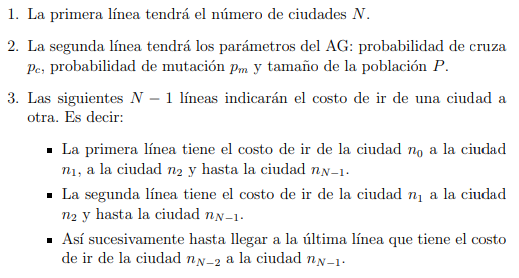

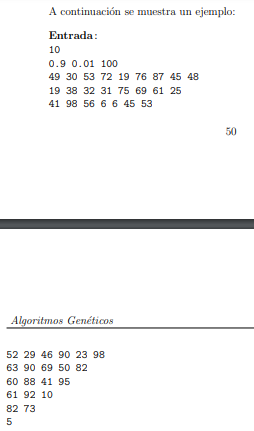

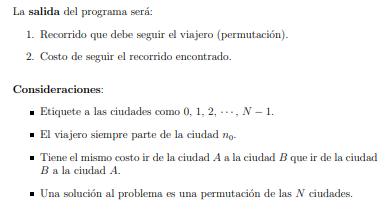

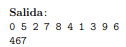

In [5]:
def input_read(URL):
    with open(URL) as file_in:
        n = int(file_in.readline())
        pc,pm,μ = file_in.readline().rstrip('\n').split(' ')
        pc,pm,μ = float(pc),float(pm),int(μ)
        half_matrix = []
        for i in range(n-1):
            line = file_in.readline().rstrip('\n').split(' ')
            half_matrix.append([float(l) for l in line])
        return n, μ, pc, pm, half_matrix

In [6]:
e_input = input_read("example_input.txt")
e_input

(10,
 100,
 0.9,
 0.01,
 [[49.0, 30.0, 53.0, 72.0, 19.0, 76.0, 87.0, 45.0, 48.0],
  [19.0, 38.0, 32.0, 31.0, 75.0, 69.0, 61.0, 25.0],
  [41.0, 98.0, 56.0, 6.0, 6.0, 45.0, 53.0],
  [52.0, 29.0, 46.0, 90.0, 23.0, 98.0],
  [63.0, 90.0, 69.0, 50.0, 82.0],
  [60.0, 88.0, 41.0, 95.0],
  [61.0, 92.0, 10.0],
  [82.0, 73.0],
  [5.0]])

In [7]:
def w_node_node(node,next_node,matrix):
    # given a first node, a second node and the adjacency matrix, return the distance between the nodes
    if next_node < node:
        new = matrix[next_node][node-next_node-1]
        return new
    else:
        new = matrix[node][next_node-(node+1)]
        return new

In [8]:
 w_node_node(5,7,e_input[4])

88.0

In [9]:
def evaluator(sol,n,matrix):
    # given a solution, n, and the adj. matrix, return the cost of the trajectory
    weights = 0
    for i in range(n-1):
        node = sol[i]
        next_node = sol[i+1]
        weights += w_node_node(node,next_node,matrix)
    weights += w_node_node(sol[n-1],0,matrix) # peso del último con el primero (0)
    return weights

In [10]:
def rand_node_sol(n):
    sol = list(range(n))
    shuffle(sol)
    return sol

In [11]:
rand_node_sol(10)

[2, 7, 9, 0, 5, 3, 6, 4, 1, 8]

In [12]:
evaluator(rand_node_sol(10),10,e_input[4])

570.0

In [13]:
def rand_sol_f(n,matrix):
    sol = rand_node_sol(n)
    return sol,evaluator(sol,n,matrix)

In [14]:
rand_sol_f(10,e_input[4])

([8, 3, 4, 1, 9, 2, 6, 0, 5, 7], 461.0)

In [ ]:
crossover(k_points, p1, p2):
    o1, o2 = '', ''
    index_closer = 0
    for i,point in enumerate(k_points+[len(p1)]):
        if i%2 == 0:
            o1 += p1[index_closer:point]
            o2 += p2[index_closer:point]
        else:
            o1 += p2[index_closer:point]
            o2 += p1[index_closer:point]
        index_closer = point
    return o1,o2

In [445]:
sorted(sample(list(range(10)),2))

[2, 3]

In [15]:
def in_range(x,ran):
    for i,r in enumerate(ran):
        if x == r:
            return i
    return False

In [16]:
in_range(3,[4,5,6]), in_range(3,[4,5,6,3])

(False, 3)

In [28]:
def not_in_range(n,p1,ran):
    not_in_r = []
    for i in range(n):
        if p1[i] not in ran:
            not_in_r.append((p1[i],i))
    return not_in_r

In [29]:
not_in_range(6,[9,4,5,186,8,7],[4,5,6,3])

[(9, 0), (186, 3), (8, 4), (7, 5)]

In [77]:
def PMX_correction(n,o,p1,p2,cut1,cut2):
    cut_range = o[cut1:cut2]
    cut_len = cut2-cut1
    p1_missing = not_in_range(cut_len,p1[cut1:cut2],cut_range)
    for (x,i) in p1_missing:
        init_x = x
        while True:
            p2_i = p2[cut1+i]
            p1_j_index = p1.index(p2_i)
            p1_j = p1[p1_j_index]
            #print(x,p2_i,p1_j_index,p1_j)
            #print(cut_range)
            if p1_j_index not in range(cut1,cut2):
                #print('ya')
                o[p1_j_index] = init_x
                break
            x = p1_j
            i = p1_j_index-cut1
    for i in range(n):
        if o[i] == -1:
            o[i] = p1[i]
    return o

In [79]:
PMX_correction(5,[3,1,2,3,4],[3,1,0,2,4],[0,1,2,3,4],2,4)

[0, 1, 2, 3, 4]

In [80]:
PMX_correction(9,[-1,-1,-1,4,5,6,7,-1,-1],[9,3,7,8,2,6,5,1,4],[1,2,3,4,5,6,7,8,9],3,7)

[9, 3, 2, 4, 5, 6, 7, 1, 8]

In [113]:
def Partially_Mapped_Crossover(n,p1,p2,cut=False):
    if cut:
        cut1,cut2 = cut
    else:
        cut1,cut2 = sorted(sample(list(range(n+1)),2))
    o1 = [-1]*cut1 + p2[cut1:cut2] + [-1]*(n-cut2)
    o2 = [-1]*cut1 + p1[cut1:cut2] + [-1]*(n-cut2)
    #return o1,o2, cut1,cut2
    return (PMX_correction(n,o1,p1,p2,cut1,cut2),0), (PMX_correction(n,o2,p2,p1,cut1,cut2),0)

In [114]:
Partially_Mapped_Crossover(10,sorted(list(range(10)),reverse=True),list(range(10)))

(([9, 8, 2, 6, 5, 4, 3, 7, 1, 0], 0), ([0, 1, 7, 3, 4, 5, 6, 2, 8, 9], 0))

In [115]:
Partially_Mapped_Crossover(9,[9,3,7,8,2,6,5,1,4],[1,2,3,4,5,6,7,8,9],cut=[3,7])

(([9, 3, 2, 4, 5, 6, 7, 1, 8], 0), ([1, 7, 3, 8, 2, 6, 5, 4, 9], 0))

In [135]:
def mutate_by_insertion(n,x,indexes):
    rand_1,rand_2 = indexes
    x.insert(rand_2, x.pop(rand_1))
    return x

In [139]:
 mutate_by_insertion(9,[9, 3, 2, 4, 5, 6, 7, 1, 8],[3,5])

[9, 3, 2, 5, 6, 4, 7, 1, 8]

In [228]:
def displacement_mutation(n,x):
    start,end = sorted(sample(list(range(n+1)),2))
    outsiders = x[:start] + x[end:]
    free_moving_range = n+1 - (end-start)
    moving_n_places = randint(0,free_moving_range)
    for i in range(n):
        if i in range(start,end):
            #print(outsiders)
            outsiders.insert((i-start)+moving_n_places,x[i]) 
    return outsiders
    #return start,end,free_moving_range,moving_n_places,outsiders

In [232]:
displacement_mutation(9,[9, 3, 2, 5, 6, 4, 7, 1, 8])

[6, 4, 7, 9, 3, 2, 5, 1, 8]

In [248]:
def pop_mutate_by_displacement(n,pop,matrix):
    mutated_pop = []
    for individual in pop:
        mutated = displacement_mutation(n,individual[0])
        f = evaluator(mutated,n,matrix)
        mutated_pop.append((mutated,f))
    return mutated_pop

In [266]:
rand_pop = [rand_sol_f(10,e_input[4]) for i in range(5)]
rand_pop, pop_mutate_by_displacement(10,rand_pop,e_input[4])

([([1, 8, 7, 9, 5, 2, 3, 6, 4, 0], 664.0),
  ([3, 6, 4, 2, 1, 0, 7, 9, 5, 8], 643.0),
  ([4, 1, 2, 5, 7, 8, 0, 3, 9, 6], 559.0),
  ([5, 4, 7, 0, 3, 9, 2, 1, 8, 6], 671.0),
  ([8, 5, 1, 4, 7, 6, 3, 9, 0, 2], 486.0)],
 [([1, 8, 9, 5, 2, 3, 7, 6, 4, 0], 619.0),
  ([3, 4, 2, 1, 0, 6, 7, 9, 5, 8], 609.0),
  ([4, 1, 2, 5, 7, 8, 0, 3, 9, 6], 559.0),
  ([5, 4, 7, 0, 3, 9, 2, 1, 6, 8], 654.0),
  ([8, 5, 1, 6, 3, 9, 0, 2, 4, 7], 623.0)])

In [269]:
def traver_problem_GA(n, μ, pc, pm, half_matrix, gens=100):
    population = [rand_sol_f(n,half_matrix) for i in range(μ)]
    parents=[]
    for gen in range(gens):
        parents = r_universal_stochastic_selection(population)
        offspring = []
        for p1,p2 in grouped(parents,2):
            offs = []
            if random() < pc:
                o1,o2 = Partially_Mapped_Crossover(n,p1[0],p2[0])
                offs = [o1,o2]
            else:
                offs = [p1,p2]
            offspring += offs
    
        offspring = pop_mutate_by_displacement(n,offspring,half_matrix)
        offspring.sort(key=lambda x:x[1])
        parents.sort(key=lambda x:x[1])
    
        if parents[0][1] < offspring[0][1]:
            offspring[-1] = parents[0]
            offspring.sort(key=lambda x:x[1])
        population = offspring
    population.sort(key=lambda x:x[1])
    return population[0]

In [289]:
e_input

(10,
 100,
 0.9,
 0.01,
 [[49.0, 30.0, 53.0, 72.0, 19.0, 76.0, 87.0, 45.0, 48.0],
  [19.0, 38.0, 32.0, 31.0, 75.0, 69.0, 61.0, 25.0],
  [41.0, 98.0, 56.0, 6.0, 6.0, 45.0, 53.0],
  [52.0, 29.0, 46.0, 90.0, 23.0, 98.0],
  [63.0, 90.0, 69.0, 50.0, 82.0],
  [60.0, 88.0, 41.0, 95.0],
  [61.0, 92.0, 10.0],
  [82.0, 73.0],
  [5.0]])

In [290]:
half_matrix = e_input[4]

In [291]:
traver_problem_GA(10, 100, 0.9, 0.01, half_matrix, gens=100)

([8, 2, 7, 6, 9, 0, 5, 3, 4, 1], 351.0)

In [295]:
traver_problem_GA(10, 1000, 0.7, 0.1, half_matrix, gens=200)

([4, 7, 1, 2, 6, 9, 8, 3, 5, 0], 297.0)

In [296]:
traver_problem_GA(10, 200, 0.7, 0.1, half_matrix, gens=500)

([0, 1, 5, 3, 4, 8, 9, 6, 2, 7], 325.0)

In [297]:
traver_problem_GA(10, 200, 0.7, 0.1, half_matrix, gens=1000)

([3, 1, 4, 8, 5, 0, 9, 6, 7, 2], 335.0)

## 6.
Permitir al usuario realizar M ejecuciones del AG, implementado en el punto anterior, para resolver una instancia del problema del agente viajero. Dicha instancia estará almacenada en un archivo que tendrá los parámetros de entrada tal y como se indicó en el punto anterior. Después de las M ejecuciones se debe reportar lo siguiente:

1. Mejor solución encontrada considerando las M ejecuciones.
2. Peor solución encontrada considerando las M ejecuciones.
3. Solución que corresponde a la mediana considerando las M ejecuciones.
4. Media del valor de la función objetivo considerando las M ejecuciones.
5. Desviación estándar del valor de la función objetivo considerando las M ejecuciones.

En los primeros tres puntos indica tanto el valor de x (permutación) como el valor de la función objetivo f (costo de hacer el recorrido). Nota: Para ese punto el usuario debe indicar el nombre del archivo de entrada y el número M de ejecuciones a realizar.

In [301]:
def m_traveler_GA(m, URL, gens=100):# n, μ, pc, pm, half_matrix, ):
    n, μ, pc, pm, half_matrix = input_read(URL)
    m_solutions = []
    for i in range(m):
        GA_sol = traver_problem_GA(n, μ, pc, pm, half_matrix, gens=gens)
        m_solutions.append(GA_sol)
    m_solutions.sort(key=lambda x:x[1])
    return m_solutions

In [309]:
m_traveler_GA(50, "example_input.txt")

[([4, 1, 7, 2, 6, 9, 8, 3, 0, 5], 242.0),
 ([4, 1, 7, 3, 8, 9, 6, 2, 0, 5], 303.0),
 ([6, 2, 7, 1, 9, 8, 4, 3, 5, 0], 309.0),
 ([4, 7, 2, 6, 9, 0, 1, 3, 8, 5], 309.0),
 ([7, 4, 5, 0, 1, 3, 8, 9, 6, 2], 312.0),
 ([4, 5, 1, 7, 2, 6, 9, 8, 3, 0], 314.0),
 ([4, 7, 6, 2, 3, 8, 9, 1, 0, 5], 317.0),
 ([0, 5, 7, 2, 6, 9, 8, 4, 3, 1], 323.0),
 ([7, 2, 6, 9, 0, 3, 5, 8, 4, 1], 324.0),
 ([7, 2, 0, 1, 4, 8, 9, 6, 5, 3], 324.0),
 ([3, 0, 1, 2, 7, 6, 9, 8, 4, 5], 335.0),
 ([1, 3, 0, 2, 7, 6, 9, 8, 4, 5], 335.0),
 ([6, 7, 2, 0, 1, 4, 9, 8, 3, 5], 336.0),
 ([8, 9, 6, 7, 2, 1, 0, 5, 4, 3], 337.0),
 ([4, 8, 3, 5, 0, 6, 9, 1, 7, 2], 337.0),
 ([3, 0, 7, 2, 6, 9, 8, 1, 4, 5], 342.0),
 ([7, 2, 9, 6, 1, 4, 8, 3, 5, 0], 345.0),
 ([7, 6, 2, 1, 0, 9, 8, 3, 4, 5], 345.0),
 ([7, 2, 6, 3, 1, 9, 0, 8, 4, 5], 346.0),
 ([4, 1, 6, 7, 2, 9, 8, 3, 0, 5], 346.0),
 ([7, 4, 3, 1, 2, 0, 5, 6, 9, 8], 347.0),
 ([6, 2, 7, 8, 3, 4, 1, 5, 0, 9], 347.0),
 ([2, 7, 8, 4, 1, 9, 6, 3, 5, 0], 347.0),
 ([1, 5, 3, 0, 7, 2, 6, 9, 8, 4], 

In [319]:
m = 100
m_solutions = m_traveler_GA(m, "example_input.txt")
m_GA_statistical_analysis(m , m_solutions)

Best solution: ([4, 7, 2, 6, 9, 8, 1, 3, 5, 0], 291.0)
Worst solution: ([8, 4, 3, 0, 5, 1, 6, 9, 7, 2], 399.0)
Median solution: ([7, 2, 1, 6, 9, 8, 0, 3, 4, 5], 347.0)
Mean solution: 348.33
Standard deviation: 22.65305939602861


In [321]:
m = 500
m_solutions = m_traveler_GA(m, "example_input.txt")
m_GA_statistical_analysis(m , m_solutions)

Best solution: ([7, 2, 6, 9, 0, 5, 1, 4, 3, 8], 272.0)
Worst solution: ([0, 7, 2, 8, 9, 6, 5, 4, 3, 1], 415.0)
Median solution: ([7, 2, 6, 4, 1, 3, 8, 5, 0, 9], 351.0)
Mean solution: 348.792
Standard deviation: 25.939790592832473


Comparando contra soluciones normales sí hay mejores soluciones:

In [320]:
[rand_sol_f(10,e_input[4]) for i in range(5)]

[([2, 1, 0, 5, 7, 6, 8, 4, 3, 9], 576.0),
 ([5, 2, 4, 8, 6, 7, 3, 1, 0, 9], 630.0),
 ([5, 8, 2, 4, 6, 0, 9, 1, 7, 3], 635.0),
 ([6, 2, 9, 4, 3, 0, 7, 1, 5, 8], 519.0),
 ([5, 2, 7, 8, 9, 1, 0, 4, 3, 6], 469.0)]